In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [ ]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df['MedHouseVal'] = data.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Text(0.5, 1.0, 'House Age vs Median House Value')

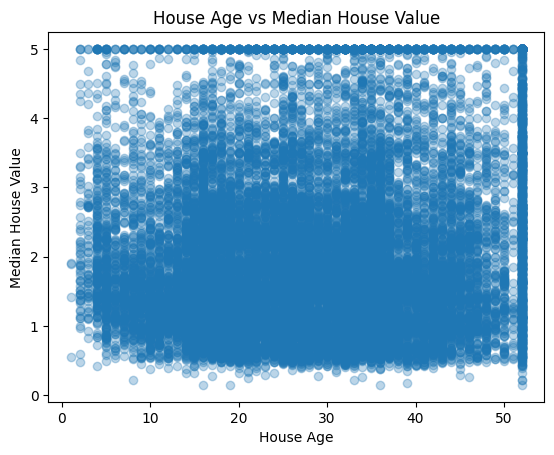

In [ ]:
plt.scatter(x=df['HouseAge'],y=df['MedHouseVal'],alpha=0.3)
plt.xlabel('House Age')
plt.ylabel('Median House Value')
plt.title('House Age vs Median House Value')


Text(0.5, 1.0, 'House Age vs Median House Value')

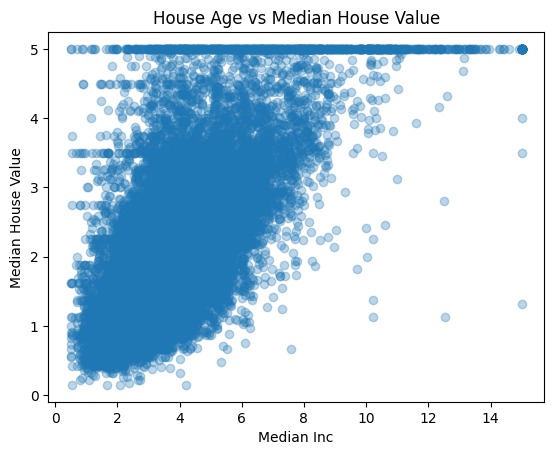

In [ ]:
plt.scatter(x=df['MedInc'],y=df['MedHouseVal'],alpha=0.3)
plt.xlabel('Median Inc')
plt.ylabel('Median House Value')
plt.title('House Age vs Median House Value')


(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

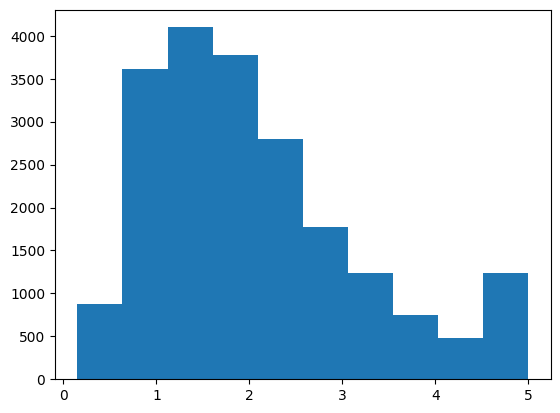

In [ ]:
plt.hist(df['MedHouseVal'])

<Axes: xlabel='MedHouseVal'>

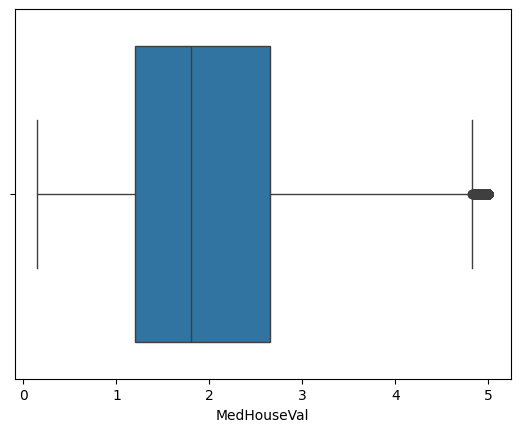

In [ ]:
import seaborn as sns
sns.boxplot(x=df['MedHouseVal'])

<Axes: >

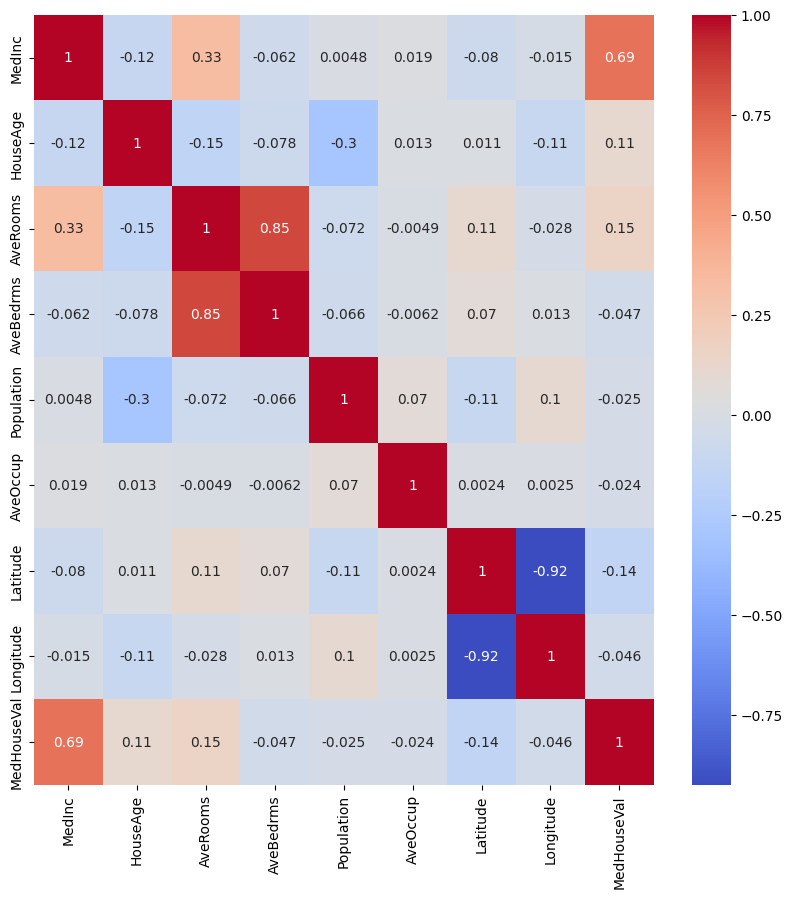

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
df['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']
df['Popperroom'] = df['Population']/df['AveRooms']
df['IncPerPerson'] = df['MedInc']/df['Population']

<Axes: >

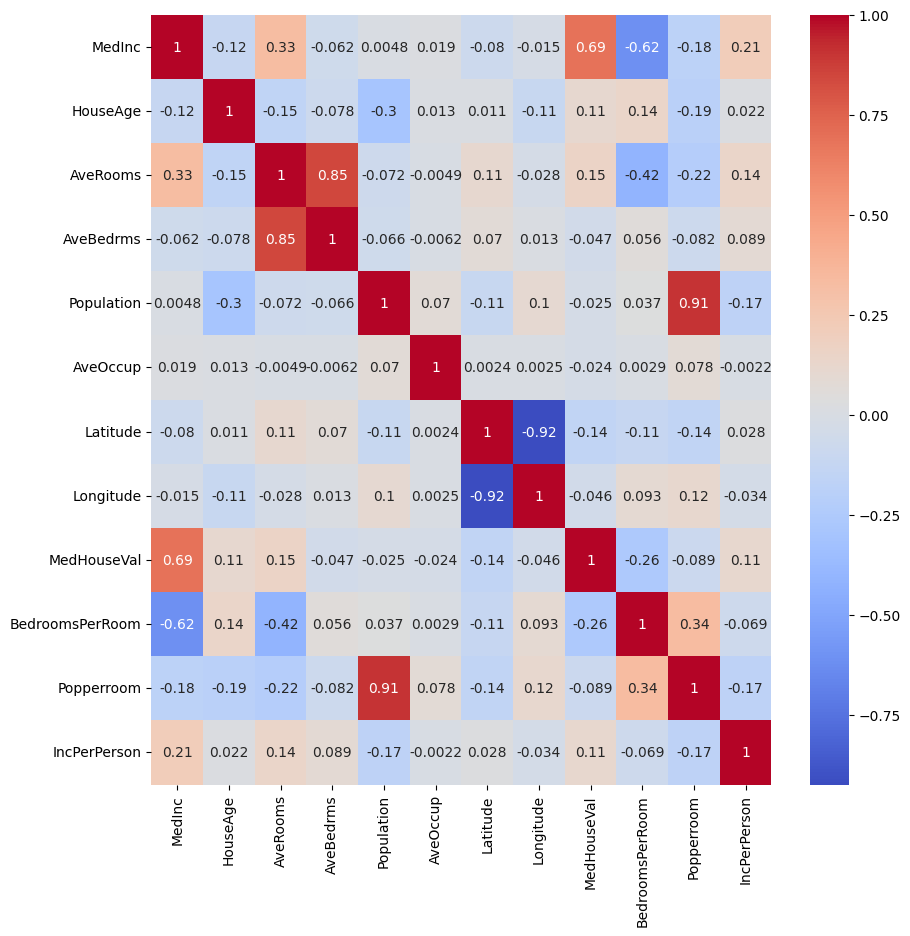

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score

y = df['MedHouseVal']
x = df.drop('MedHouseVal',axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("Mean absolute Error is " ,mean_absolute_error(y_test,pred))
print("R2 score is ", r2_score(y_test,pred))
print("Mean squared error is", mean_squared_error(y_test,pred))

Mean absolute Error is  0.5263027337794661
R2 score is  0.5940434551315756
Mean squared error is 0.5319691011712379


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rmodel = RandomForestRegressor(n_estimators=100,random_state=42)
rmodel.fit(x_train,y_train)
predict = rmodel.predict(x_test)
print("Mean absolute Error is " ,mean_absolute_error(y_test,predict))
print("R2 score is ", r2_score(y_test,predict))
print("Mean squared error is", mean_squared_error(y_test,predict))

Mean absolute Error is  0.32946569060077535
R2 score is  0.803221543547554
Mean squared error is 0.257860256059671


[]

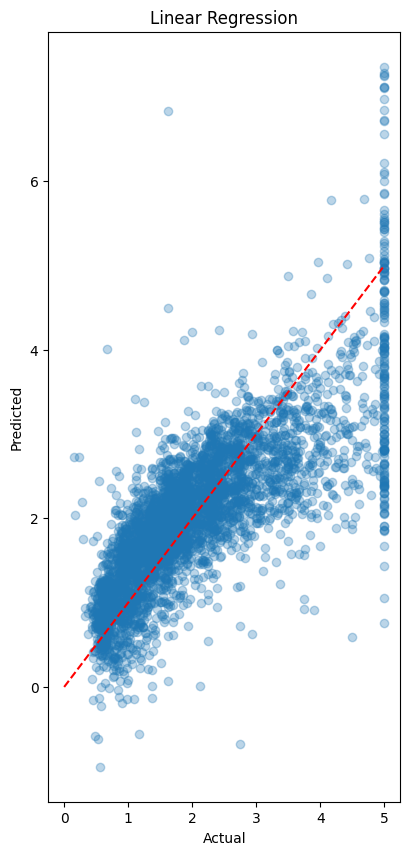

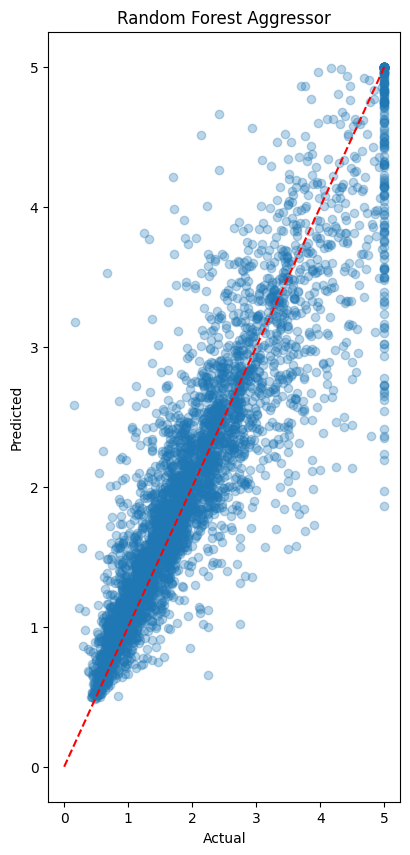

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.scatter(y_test,pred,alpha=0.3,label='Linear Model')
plt.plot([0,5],[0,5],'--',color='red')
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.scatter(y_test,predict,alpha=0.3,label='Random Forest Model')
plt.plot([0,5],[0,5],'--',color='red')
plt.title("Random Forest Aggressor")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot()

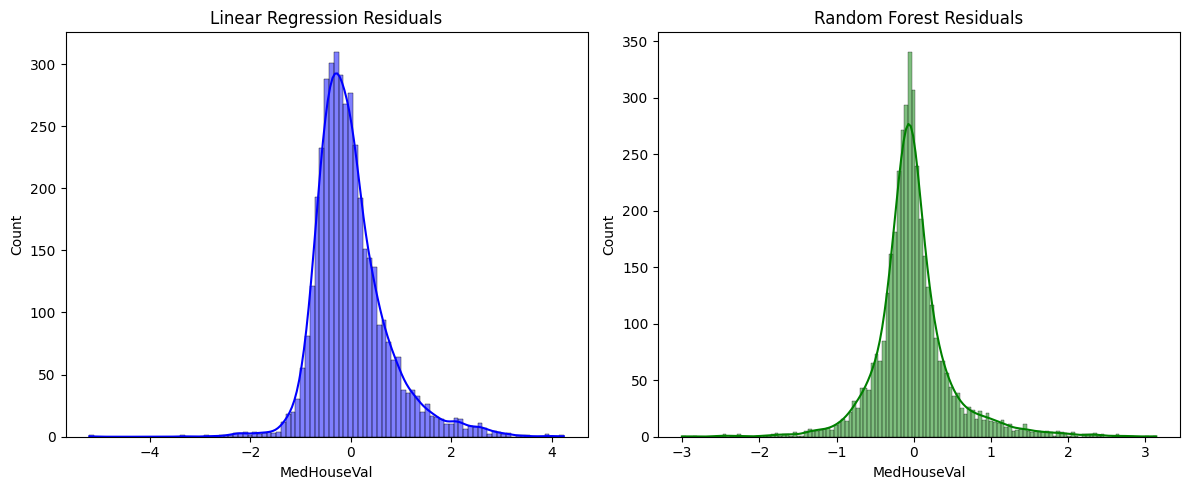

In [ ]:
lr_residuals = y_test-pred
rf_residuals = y_test - predict
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(lr_residuals,kde=True,color='blue')
plt.title("Linear Regression Residuals")

plt.subplot(1, 2, 2)
sns.histplot(rf_residuals, kde=True, color='green')
plt.title("Random Forest Residuals")
plt.tight_layout()
plt.show()